# Course Description
In this course, you will learn techniques that will allow you to extract useful information from text and process them into a format suitable for applying ML models. More specifically, you will learn about POS tagging, named entity recognition, readability scores, the n-gram and tf-idf models, and how to implement them using scikit-learn and spaCy. You will also learn to compute how similar two documents are to each other. In the process, you will predict the sentiment of movie reviews and build movie and Ted Talk recommenders. Following the course, you will be able to engineer critical features out of any text and solve some of the most challenging problems in data science!

# Review

1. Basic features
2. Readability score
3. tokenization and lemmatization
4. Text cleaning
5. POS tagging and NER 
6. n-gram modeling 
7. tf-idf
8. Cosine similiarity
9. Word embidding

# One-hot encoding
In the previous exercise, we encountered a dataframe df1 which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert df1 into a format that is suitable for machine learning.

In [ ]:
# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

# Character count of Russian tweets
In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature 'char_count' in tweets which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the content feature of tweets.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

In [ ]:
import pandas as pd
import numpy as np
tweets= pd.read_csv('russian_tweets.csv')
tweets.drop(columns=['Unnamed: 0'], inplace=True	)

In [ ]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


# Word count of TED talks
ted is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature word_count which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the transcript feature in ted.

In order to complete this task, you will need to define a function count_words that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the transcript feature of ted to create the new feature word_count and compute its mean.

In [ ]:
ted= pd.read_csv('ted.csv')
ted.drop(columns=['url'], inplace=True)

In [ ]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()

    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


# Hashtags and mentions in Russian tweets
Let's revisit the tweets dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions count_hashtags() and count_mentions() respectively and applying them to the content feature of tweets.

In case you don't recall, the tweets are contained in the content feature of tweets

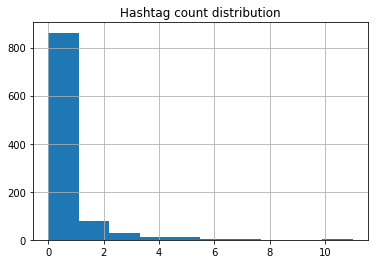

In [ ]:
import matplotlib.pyplot as plt

#  Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

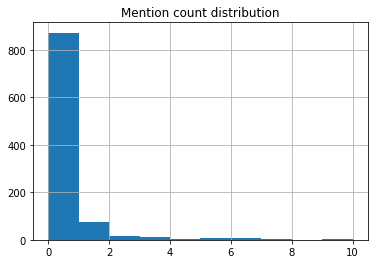

In [ ]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

# Readability of 'The Myth of Sisyphus'
In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

The entire essay is in the form of a string and is available as sisyphus_essay.

In [ ]:
sisyphus_essay= '\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a man\'s heart. One must imagine Sisyphus happy.\n'


In [ ]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

# score is 81.67 6th grade reading level. Higher score on Flesch scale easier to read

The Flesch Reading Ease is 81.67


# Readability of various publications
In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:

forbes- An excerpt from an article from Forbes magazine on the Chinese social credit score system.

harvard_law- An excerpt from a book review published in Harvard Law Review.

r_digest- An excerpt from a Reader's Digest article on flight turbulence.

time_kids - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

In [ ]:
forbes= '\nThe idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.\n'
harvard_law= '\nIn his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship. \n'
r_digest= '\nThis week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.\n'
time_kids='\nThat, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.\n'


In [ ]:
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
  readability_scores = Textatistic(excerpt).scores
  gunning_fog = readability_scores['gunningfog_score']
  gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

# higher on Gunning_fog score harder to read 

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


# Tokenizing the Gettysburg Address
In this exercise, you will be tokenizing one of the most famous speeches of all time: the Gettysburg Address delivered by American President Abraham Lincoln during the American Civil War.

The entire speech is available as a string named gettysburg.

In [ ]:
gettysburg= "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."


In [ ]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

# Lemmatizing the Gettysburg address
In this exercise, we will perform lemmatization on the same gettysburg address from before.

However, this time, we will also take a look at the speech, before and after lemmatization, and try to adjudge the kind of changes that take place to make the piece more machine friendly.

In [ ]:
print(gettysburg)

Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so no

In [ ]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we 've come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we can not dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thus

# Cleaning a blog post
In this exercise, you have been given an excerpt from a blog post. Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

The excerpt is available as a string blog and has been printed to the console. The list of stopwords are available as stopwords.

In [ ]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

print(len(stopwords))
print(stopwords)
blog='\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'


326
{'eight', '’m', 'ourselves', 'front', 'hence', 'yourself', 'whom', 'would', 'to', 'can', 'when', 'too', 'here', 'latter', 'whose', 'by', 'nevertheless', 'may', 'becomes', "'ll", 'where', 'yours', 'forty', 'show', 'others', 'below', 'else', 'third', 'whole', 'hundred', 'part', 'sometimes', 'fifteen', 'less', 'become', 'say', 'with', 'four', 'nine', 'although', 'it', 'before', 'whether', 'namely', 'everywhere', 'his', 'move', 'are', 'as', 'also', 'latterly', 'above', 'now', 'onto', 'former', 'of', 'he', 'beyond', 'used', 're', 'me', 'or', 'whereupon', 'very', 'even', 'few', 'do', 'noone', 'much', 'further', 'either', 'every', 'put', 'throughout', 'becoming', 'really', 'everything', 'hereafter', 'yourselves', 'more', 'themselves', 'per', 'am', 'least', '’re', 'how', 'this', '’ll', 'is', 'due', "'re", 'nowhere', 'anyway', 'however', 'take', 'various', 'top', 'herself', 'cannot', 'through', 'see', 'she', "'ve", 'their', 'that', 'why', 'whereafter', 'after', 'any', 'made', 'sometime', 's

In [ ]:
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


# Cleaning TED talks in a dataframe
In this exercise, we will revisit the TED Talks from the first chapter. You have been a given a dataframe ted consisting of 5 TED Talks. Your task is to clean these talks using techniques discussed earlier by writing a function preprocess and applying it to the transcript feature of the dataframe.

The stopwords list is available as stopwords.

In [ ]:
ted= pd.read_csv('ted.csv')
ted=ted.loc[0:19]

(20, 2)

In [ ]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

0     talk new lecture TED I illusion create TED I t...
1     representation brain brain break left half log...
2     great honor today share Digital Universe creat...
3     passion music technology thing combination thi...
4     use want computer new program programming requ...
5     I neuroscientist mixed background physics medi...
6     Pat Mitchell day January begin like work love ...
7     Taylor Wilson I year old I nuclear physicist l...
8     I grow Northern Ireland right north end absolu...
9     I publish article New York Times Modern Love c...
10    Joseph Member Parliament Kenya picture Maasai ...
11    hi I talk little bit music machine life specif...
12    hi let I ask audience question lie child raise...
13    historical record allow know ancient Greeks dr...
14    good morning I little boy I experience change ...
15    I slide I year ago time I short slide morning ...
16    I like world I like share year old love story ...
17    I fail woman I fail feminist I passionate 

# POS tagging in Lord of the Flies
In this exercise, you will perform part-of-speech tagging on a famous passage from one of the most well-known novels of all time, Lord of the Flies, authored by William Golding.

The passage is available as lotf and has already been printed to the console.

In [ ]:
lotf= 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'


In [ ]:
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'SCONJ'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NUM'), ('’s', 'NUM'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'NUM'), ('’s', 'NUM'), ('feet', 'NOUN'), ('.', 'PUNCT')]


# Counting nouns in a piece of text
In this exercise, we will write two functions, nouns() and proper_nouns() that will count the number of other nouns and proper nouns in a piece of text respectively.

These functions will take in a piece of text and generate a list containing the POS tags for each word. It will then return the number of proper nouns/other nouns that the text contains. We will use these functions in the next exercise to generate interesting insights about fake news.

The en_core_web_sm model has already been loaded as nlp in this exercise.

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [ ]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


# Noun usage in fake news
In this exercise, you have been given a dataframe headlines that contains news headlines that are either fake or real. Your task is to generate two new features num_propn and num_noun that represent the number of proper nouns and other nouns contained in the title feature of headlines.

Next, we will compute the mean number of proper nouns and other nouns used in fake and real news headlines and compare the values. If there is a remarkable difference, then there is a good chance that using the num_propn and num_noun features in fake news detectors will improve its performance.

To accomplish this task, the functions proper_nouns and nouns that you had built in the previous exercise have already been made available to you.

In [ ]:
headlines= pd.read_csv('fakenews.csv')
headlines.head()

,Unnamed: 0,title,label
0,0,You Can Smell Hillary’s Fear,FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,4,The Battle of New York: Why This Primary Matters,REAL


In [ ]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

Mean no. of proper nouns in real and fake headlines are 2.37 and 4.81 respectively


In [ ]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of other nouns in real and fake headlines are 2.39 and 1.60 respectively


# Named entities in a sentence
In this exercise, we will identify and classify the labels of various named entities in a body of text using one of spaCy's statistical models. We will also verify the veracity of these labels.

In [ ]:
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


# Identifying people mentioned in a news article
In this exercise, you have been given an excerpt from a news article published in TechCrunch. Your task is to write a function find_people that identifies the names of people that have been mentioned in a particular piece of text. You will then use find_people to identify the people of interest in the article.

The article is available as the string tc and has been printed to the console. The required spacy model has also been already loaded as nlp.

In [ ]:
tc= "\nIt’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.\n"


In [ ]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

print(find_persons(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


# BoW model for movie taglines
In this exercise, you have been provided with a corpus of more than 7000 movie tag lines. Your job is to generate the bag of words representation bow_matrix for these taglines. For this exercise, we will ignore the text preprocessing step and generate bow_matrix directly.

We will also investigate the shape of the resultant bow_matrix. The first five taglines in corpus have been printed to the console for you to examine.

In [ ]:
corpus= corpus.tagline

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)

(4421, 5384)


# Analyzing dimensionality and preprocessing
In this exercise, you have been provided with a lem_corpus which contains the pre-processed versions of the movie taglines from the previous exercise. In other words, the taglines have been lowercased and lemmatized, and stopwords have been removed.

Your job is to generate the bag of words representation bow_lem_matrix for these lemmatized taglines and compare its shape with that of bow_matrix obtained in the previous exercise. The first five lemmatized taglines in lem_corpus have been printed to the console for you to examine.

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

# Mapping feature indices with feature names
In the lesson video, we had seen that CountVectorizer doesn't necessarily index the vocabulary in alphabetical order. In this exercise, we will learn to map each feature index to its corresponding feature name from the vocabulary.

We will use the same three sentences on lions from the video. The sentences are available in a list named corpus and has already been printed to the console.

In [ ]:
corpus= ['The lion is the king of the jungle',
 'Lions have lifespans of a decade',
 'The lion is an endangered species']

In [ ]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names())

# Print bow_df
print(bow_df)

   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# BoW vectors for movie reviews
In this exercise, you have been given two pandas Series, X_train and X_test, which consist of movie reviews. They represent the training and the test review data respectively. Your task is to preprocess the reviews and generate BoW vectors for these two sets using CountVectorizer.

Once we have generated the BoW vector matrices X_train_bow and X_test_bow, we will be in a very good position to apply a machine learning model to it and conduct sentiment analysis.

In [ ]:
from sklearn.model_selection import train_test_split
df= pd.read_csv('movie_reviews_clean.csv')
X= df.review
y=df.sentiment 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.75)

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(250, 7898)
(750, 7898)


# Predicting the sentiment of a movie review
In the previous exercise, you generated the bag-of-words representations for the training and test movie review data. In this exercise, we will use this model to train a Naive Bayes classifier that can detect the sentiment of a movie review and compute its accuracy. Note that since this is a binary classification problem, the model is only capable of classifying a review as either positive (1) or negative (0). It is incapable of detecting neutral reviews.

In case you don't recall, the training and test BoW vectors are available as X_train_bow and X_test_bow respectively. The corresponding labels are available as y_train and y_test respectively. Also, for you reference, the original movie review dataset is available as df.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting medicore"
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.771
The sentiment predicted by the classifier is 0


# n-gram models for movie tag lines
In this exercise, we have been provided with a corpus of more than 9000 movie tag lines. Our job is to generate n-gram models up to n equal to 1, n equal to 2 and n equal to 3 for this data and discover the number of features for each model.

We will then compare the number of features generated for each model.

In [ ]:
corpus

1               Roll the dice and unleash the excitement!
2       Still Yelling. Still Fighting. Still Ready for...
3       Friends are the people who let you be yourself...
4       Just When His World Is Back To Normal... He's ...
5                                A Los Angeles Crime Saga
                              ...                        
5548                   Everything else was just practice!
5549                   Why do we want what we can't have?
5550    The call of the wild, the thrill of adventure....
5551    ELVIS with songs and adventures in mad mod Eur...
5552    ...singing! ...chasing! ...racing ...romancing...
Name: tagline, Length: 4421, dtype: object

In [ ]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 5384, 28079 and 56675 features respectively


# Higher order n-grams for sentiment analysis
Similar to a previous exercise, we are going to build a classifier that can detect if the review of a particular movie is positive or negative. However, this time, we will use n-grams up to n=2 for the task.

The n-gram training reviews are available as X_train_ng. The corresponding test reviews are available as X_test_ng. Finally, use y_train and y_test to access the training and test sentiment classes respectively.

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.5)
# Create a CountVectorizer object
ng_vectorizer = CountVectorizer(ngram_range=(1,2))
X_train_ng= ng_vectorizer.fit_transform(X_train)
X_test_ng= ng_vectorizer.transform(X_test)
# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.762
The sentiment predicted by the classifier is 0


# Comparing performance of n-gram models
You now know how to conduct sentiment analysis by converting text into various n-gram representations and feeding them to a classifier. In this exercise, we will conduct sentiment analysis for the same movie reviews from before using two n-gram models: unigrams and n-grams upto n equal to 3.

We will then compare the performance using three criteria: accuracy of the model on the test set, time taken to execute the program and the number of features created when generating the n-gram representation.

In [ ]:
import time
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.177 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [ ]:
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 2.172 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


# tf-idf vectors for TED talks
In this exercise, you have been given a corpus ted which contains the transcripts of 500 TED Talks. Your task is to generate the tf-idf vectors for these talks.

In a later lesson, we will use these vectors to generate recommendations of similar talks based on the transcript.

In [ ]:
ted= pd.read_csv('ted.csv')
ted= ted.transcript
ted.head()

0    We're going to talk — my — a new lecture, just...
1    This is a representation of your brain, and yo...
2    It's a great honor today to share with you The...
3    My passions are music, technology and making t...
4    It used to be that if you wanted to get a comp...
Name: transcript, dtype: object

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer= TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


# Computing dot product
In this exercise, we will learn to compute the dot product between two vectors, A = (1, 3) and B = (-2, 2), using the numpy library. More specifically, we will use the np.dot() function to compute the dot product of two numpy arrays.

In [ ]:
import numpy as np
# Initialize numpy vectors
A = np.array([1,3])
B = np.array([-2,2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

# (1* -2) + (3*2)

4


# Cosine similarity matrix of a corpus
In this exercise, you have been given a corpus, which is a list containing five sentences. The corpus is printed in the console. You have to compute the cosine similarity matrix which contains the pairwise cosine similarity score for every pair of sentences (vectorized using tf-idf).

Remember, the value corresponding to the ith row and jth column of a similarity matrix denotes the similarity score for the ith and jth vector.

In [ ]:
corpus= ['The sun is the largest celestial body in the solar system',
 'The solar system consists of the sun and eight revolving planets',
 'Ra was the Egyptian Sun God',
 'The Pyramids were the pinnacle of Egyptian architecture',
 'The quick brown fox jumps over the lazy dog']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


# Comparing linear_kernel and cosine_similarity
In this exercise, you have been given tfidf_matrix which contains the tf-idf vectors of a thousand documents. Your task is to generate the cosine similarity matrix for these vectors first using cosine_similarity and then, using linear_kernel.

We will then compare the computation times for both functions.

In [ ]:
import time
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]
Time taken: 0.004595756530761719 seconds


In [ ]:
from sklearn.metrics.pairwise import linear_kernel
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]
Time taken: 0.008028745651245117 seconds


# Plot recommendation engine
In this exercise, we will build a recommendation engine that suggests movies based on similarity of plot lines. You have been given a get_recommendations() function that takes in the title of a movie, a similarity matrix and an indices series as its arguments and outputs a list of most similar movies. indices has already been provided to you.

You have also been given a movie_plots Series that contains the plot lines of several movies. Your task is to generate a cosine similarity matrix for the tf-idf vectors of these plots.

Consequently, we will check the potency of our engine by generating recommendations for one of my favorite movies, The Dark Knight Rises

In [ ]:
def get_recommendations(title, cosine_sim, indices):
    # Get the index of the movie that matches the title 
    idx = indices[title]  
    # Get the pairwsie similarity scores 
    sim_scores = list(enumerate(cosine_sim[idx]))
     # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11] 
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]   
    # Return the top 10 most similar movies   
    return metadata['title'].iloc[movie_indices]

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(metadata)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('Jumanji', cosine_sim, indices))

1    Jumanji
Name: title, dtype: object


# The recommender function
In this exercise, we will build a recommender function get_recommendations(), as discussed in the lesson and the previous exercise. As we know, it takes in a title, a cosine similarity matrix, and a movie title and index mapping as arguments and outputs a list of 10 titles most similar to the original title (excluding the title itself).

You have been given a dataset metadata that consists of the movie titles and overviews. The head of this dataset has been printed to console

In [ ]:
import pandas as pd
metadata= pd.read_csv('movie_overviews.csv')
metadata= metadata.drop(['overview','id'], axis=1)
metadata= metadata.dropna()
metadata=metadata.iloc[0:1008]
metadata

,title,tagline
1,Jumanji,Roll the dice and unleash the excitement!
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...
3,Waiting to Exhale,Friends are the people who let you be yourself...
4,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...
5,Heat,A Los Angeles Crime Saga
...,...,...
1221,Warriors of Virtue,In a world beyond your imagination a battle fo...
1223,The Fifth Element,There is no future without it.
1224,Nowhere,Let the love feast begin.
1225,Losing Chase,A love they never imagined. A summer they neve...


In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

# TED talk recommender
In this exercise, we will build a recommendation system that suggests TED Talks based on their transcripts. You have been given a get_recommendations() function that takes in the title of a talk, a similarity matrix and an indices series as its arguments, and outputs a list of most similar talks. indices has already been provided to you.

You have also been given a transcripts series that contains the transcripts of around 500 TED talks. Your task is to generate a cosine similarity matrix for the tf-idf vectors of the talk transcripts.

Consequently, we will generate recommendations for a talk titled '5 ways to kill your dreams' by Brazilian entrepreneur Bel Pesce.

In [37]:
transcripts= pd.read_csv('ted.csv')
transcripts
indices = pd.Series(transcripts.index, index=transcripts['transcript']).drop_duplicates()
transcripts= transcripts.transcript

In [42]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(transcripts)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices))

# Generating word vectors
In this exercise, we will generate the pairwise similarity scores of all the words in a sentence. The sentence is available as sent and has been printed to the console for your convenience.

In [43]:
import spacy
sent= 'I like apples and oranges'
nlp= spacy.load('en_core_web_sm')

# Create the doc object
doc = nlp(sent)

# Compute pairwise similarity scores
for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.038143739104270935
I apples 0.11804480850696564
I and 0.01609804295003414
I oranges 0.005146890878677368
like I 0.038143739104270935
like like 1.0
like apples 0.07367134094238281
like and 0.08407419919967651
like oranges 0.08503485471010208
apples I 0.11804480850696564
apples like 0.07367134094238281
apples apples 1.0
apples and -0.14230993390083313
apples oranges 0.5356359481811523
and I 0.01609804295003414
and like 0.08407419919967651
and apples -0.14230993390083313
and and 1.0
and oranges 0.05871482938528061
oranges I 0.005146890878677368
oranges like 0.08503485471010208
oranges apples 0.5356359481811523
oranges and 0.05871482938528061
oranges oranges 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  # This is added back by InteractiveShellApp.init_path()


# Computing similarity of Pink Floyd songs
In this final exercise, you have been given lyrics of three songs by the British band Pink Floyd, namely 'High Hopes', 'Hey You' and 'Mother'. The lyrics to these songs are available as hopes, hey and mother respectively.

Your task is to compute the pairwise similarity between mother and hopes, and mother and hey.

In [44]:
mother= "\nMother do you think they'll drop the bomb?\nMother do you think they'll like this song?\nMother do you think they'll try to break my balls?\nOoh, ah\nMother should I build the wall?\nMother should I run for President?\nMother should I trust the government?\nMother will they put me in the firing mine?\nOoh ah,\nIs it just a waste of time?\nHush now baby, baby, don't you cry.\nMama's gonna make all your nightmares come true.\nMama's gonna put all her fears into you.\nMama's gonna keep you right here under her wing.\nShe won't let you fly, but she might let you sing.\nMama's gonna keep baby cozy and warm.\nOoh baby, ooh baby, ooh baby,\nOf course mama's gonna help build the wall.\nMother do you think she's good enough, for me?\nMother do you think she's dangerous, to me?\nMother will she tear your little boy apart?\nOoh ah,\nMother will she break my heart?\nHush now baby, baby don't you cry.\nMama's gonna check out all your girlfriends for you.\nMama won't let anyone dirty get through.\nMama's gonna wait up until you get in.\nMama will always find out where you've been.\nMama's gonna keep baby healthy and clean.\nOoh baby, ooh baby, ooh baby,\nYou'll always be baby to me.\nMother, did it need to be so high?\n"
hopes= "\nBeyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough down this road we've been so many times\nThe grass was greener\nThe light was brighter\nThe taste was sweeter\nThe nights of wonder\nWith friends surrounded\nThe dawn mist glowing\nThe water flowing\nThe endless river\nForever and ever\n"
hey= "\nHey you, out there in the cold\nGetting lonely, getting old\nCan you feel me?\nHey you, standing in the aisles\nWith itchy feet and fading smiles\nCan you feel me?\nHey you, don't help them to bury the light\nDon't give in without a fight\nHey you out there on your own\nSitting naked by the phone\nWould you touch me?\nHey you with you ear against the wall\nWaiting for someone to call out\nWould you touch me?\nHey you, would you help me to carry the stone?\nOpen your heart, I'm coming home\nBut it was only fantasy\nThe wall was too high\nAs you can see\nNo matter how he tried\nHe could not break free\nAnd the worms ate into his brain\nHey you, out there on the road\nAlways doing what you're told\nCan you help me?\nHey you, out there beyond the wall\nBreaking bottles in the hall\nCan you help me?\nHey you, don't tell me there's no hope at all\nTogether we stand, divided we fall\n"


In [49]:
import warnings
warnings.filterwarnings("ignore")
# Create Doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.3727806889000733
0.7284945087561433
